<a href="https://colab.research.google.com/github/shaharec/ML-projects/blob/main/HB_handwrite_Transfer_Learnning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hebrew handwrite letter recognizer
this modle is desiged to recognize hebrew handwrite.
the dataset is taken from BG univecity israel.
in this nootbook we will use an existing netwerk and train her last layer by using tranfer learning.

Research artical - https://www.cs.bgu.ac.il/~berat/papers/icfhr2020_the_hhd_dataset.pdf




#Set up
Lets import neccacery libraries.


In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

import tensorflow as tf
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

#Date preparation
## Load data

In [ ]:
# this mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# enter the foldername in your Drive where you have saved the unzipped
FOLDERNAME = 'data_sience/Project/handwrite recognizer/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

import os 
sys_path = os.path.join('/content/drive/My Drive/',FOLDERNAME)
print (sys_path)


%cd drive/My\ Drive/$FOLDERNAME/

Mounted at /content/drive
/content/drive/My Drive/data_sience/Project/handwrite recognizer/
/content/drive/My Drive/data_sience/Project/handwrite recognizer


In [ ]:
def plot_lossAndAccuracy(EPOCHS,history):
  epochs_range = range(EPOCHS)

  train_acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  train_loss = history.history['loss']
  val_loss = history.history['val_loss']

  fig, ax = plt.subplots(2,1)
  #plot loss graph
  ax[0].plot(epochs_range,train_loss,color = 'b', label = "Training loss")
  ax[0].plot(epochs_range,val_loss,color = 'r', label = "validation loss")
  legend = ax[0].legend(loc = 'best',shadow = True)
  #plot accuracy graph
  ax[1].plot(epochs_range,train_acc,color = 'b', label = "Training accuracy")
  ax[1].plot(epochs_range,val_acc,color = 'r', label = "validation accuracy")
  legend = ax[1].legend(loc = 'best',shadow = True)

In [ ]:
# # only if csv file doesnt exist

# train_X =pd.DataFrame()
# train_Y =pd.DataFrame()
# height = 28
# length = 28
 

# for i in range(28):
#   found =True
#   j = 1
#   while found:
#     path = os.path.join(sys_path, "input/TRAIN/")  + str(i) + "/" + str(i) +"_" + str(j) + ".png"
#     try:
#       img_array = np.array(Image.open(path).resize((height,length)))
#     except:
#       print("finish path:",path)
#       found = False
#       img = Image.fromarray(np.array(img_array).reshape(height,length,3),'RGB')
#       display(img)
#     else:
#       train_X = train_X.append(pd.DataFrame(img_array.reshape(1,height*length*3)),ignore_index=True)
#       train_Y = train_Y.append(pd.DataFrame([i]),ignore_index=True)
#       j+=1

# print(train_X.head())


# #save to CSV
# train_X.to_csv("train_X.csv",index=False)
# train_Y.to_csv("train_Y.csv",index=False)



finish path: /content/drive/My Drive/data_sience/Project/handwrite recognizer/input/TRAIN/0/0_150.png


finish path: /content/drive/My Drive/data_sience/Project/handwrite recognizer/input/TRAIN/1/1_150.png


finish path: /content/drive/My Drive/data_sience/Project/handwrite recognizer/input/TRAIN/2/2_150.png


finish path: /content/drive/My Drive/data_sience/Project/handwrite recognizer/input/TRAIN/3/3_150.png


finish path: /content/drive/My Drive/data_sience/Project/handwrite recognizer/input/TRAIN/4/4_149.png


finish path: /content/drive/My Drive/data_sience/Project/handwrite recognizer/input/TRAIN/5/5_150.png


finish path: /content/drive/My Drive/data_sience/Project/handwrite recognizer/input/TRAIN/6/6_150.png


finish path: /content/drive/My Drive/data_sience/Project/handwrite recognizer/input/TRAIN/7/7_150.png


finish path: /content/drive/My Drive/data_sience/Project/handwrite recognizer/input/TRAIN/8/8_150.png


finish path: /content/drive/My Drive/data_sience/Project/handwrite recognizer/input/TRAIN/9/9_150.png


finish path: /content/drive/My Drive/data_sience/Project/handwrite recognizer/input/TRAIN/10/10_150.png


finish path: /content/drive/My Drive/data_sience/Project/handwrite recognizer/input/TRAIN/11/11_126.png


finish path: /content/drive/My Drive/data_sience/Project/handwrite recognizer/input/TRAIN/12/12_151.png


finish path: /content/drive/My Drive/data_sience/Project/handwrite recognizer/input/TRAIN/13/13_150.png


finish path: /content/drive/My Drive/data_sience/Project/handwrite recognizer/input/TRAIN/14/14_134.png


finish path: /content/drive/My Drive/data_sience/Project/handwrite recognizer/input/TRAIN/15/15_150.png


finish path: /content/drive/My Drive/data_sience/Project/handwrite recognizer/input/TRAIN/16/16_134.png


finish path: /content/drive/My Drive/data_sience/Project/handwrite recognizer/input/TRAIN/17/17_148.png


finish path: /content/drive/My Drive/data_sience/Project/handwrite recognizer/input/TRAIN/18/18_150.png


finish path: /content/drive/My Drive/data_sience/Project/handwrite recognizer/input/TRAIN/19/19_150.png


finish path: /content/drive/My Drive/data_sience/Project/handwrite recognizer/input/TRAIN/20/20_132.png


finish path: /content/drive/My Drive/data_sience/Project/handwrite recognizer/input/TRAIN/21/21_146.png


finish path: /content/drive/My Drive/data_sience/Project/handwrite recognizer/input/TRAIN/22/22_132.png


finish path: /content/drive/My Drive/data_sience/Project/handwrite recognizer/input/TRAIN/23/23_149.png


finish path: /content/drive/My Drive/data_sience/Project/handwrite recognizer/input/TRAIN/24/24_156.png


finish path: /content/drive/My Drive/data_sience/Project/handwrite recognizer/input/TRAIN/25/25_146.png


finish path: /content/drive/My Drive/data_sience/Project/handwrite recognizer/input/TRAIN/26/26_144.png


finish path: /content/drive/My Drive/data_sience/Project/handwrite recognizer/input/TRAIN/27/27_27.png


   0     1     2     3     4     5     ...  2346  2347  2348  2349  2350  2351
0   255   255   255   255   255   255  ...   253   254   250   254   254   254
1   252   252   252   253   253   253  ...   255   255   255   255   255   255
2   255   255   254   255   255   254  ...   249   255   255   254   255   255
3   255   255   255   255   255   255  ...   255   255   255   255   255   255
4   254   254   254   255   255   255  ...   255   255   255   254   254   254

[5 rows x 2352 columns]


In [ ]:
classes = ['א','ב','ג','ד','ה','ו','ז','ח','ט','י','כ','ך',
           'ל','מ','ם','נ','ן','ס','ע','פ','ף','צ','ק','ר','ש','ת',',']
num_classes = 28

#import the test data

In [ ]:
# test_X =pd.DataFrame()
# test_Y =pd.DataFrame()

# for i in range(28):
#   found =True
#   j = 186
#   while found:
#     path = os.path.join(sys_path, "input/TEST/")  + str(i) + "/" + str(i) +"_" + str(j) + ".png"
#     try:
#       img_array = np.array(Image.open(path).resize((height,length)))
#     except:
#       print("finish path:",path)
#       found = False
#       img = Image.fromarray(np.array(img_array).reshape(height,length,3),'RGB')
#       display(img)
#     else:
#       test_X = train_X.append(pd.DataFrame(img_array.reshape(1,height*length*3)),ignore_index=True)
#       test_Y = train_Y.append(pd.DataFrame([i]),ignore_index=True)
#       j+=1


In [ ]:
# #save to CSV
# test_X.to_csv("train_X.csv",index=False)
# test_Y.to_csv("train_Y.csv",index=False)


In [ ]:
train_X = pd.read_csv(os.path.join(sys_path, "train_X.csv"),header = None)
train_Y = pd.read_csv(os.path.join(sys_path, "train_Y.csv"),header = None)

In [ ]:
train_X.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2312,2313,2314,2315,2316,2317,2318,2319,2320,2321,2322,2323,2324,2325,2326,2327,2328,2329,2330,2331,2332,2333,2334,2335,2336,2337,2338,2339,2340,2341,2342,2343,2344,2345,2346,2347,2348,2349,2350,2351
0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2312,2313,2314,2315,2316,2317,2318,2319,2320,2321,2322,2323,2324,2325,2326,2327,2328,2329,2330,2331,2332,2333,2334,2335,2336,2337,2338,2339,2340,2341,2342,2343,2344,2345,2346,2347,2348,2349,2350,2351
1,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,253,253,253,252,252,252,254,254,254,254,254,254,251,251,251,254,254,254,255,255,254,255,...,254,254,254,254,254,254,254,255,255,255,255,255,255,254,254,254,255,255,255,255,255,255,255,255,254,255,255,243,246,247,239,247,247,242,253,254,250,254,254,254
2,252,252,252,253,253,253,255,255,255,254,254,254,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,254,255,254,254,254,254,254,254,254,254,254,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
3,255,255,254,255,255,254,255,255,255,254,254,254,254,254,253,255,255,254,254,255,255,255,255,255,255,255,255,255,255,255,254,253,255,255,254,255,255,255,254,254,...,255,255,255,255,255,255,255,254,254,253,254,254,253,251,255,255,246,253,254,243,254,255,243,255,255,243,255,255,243,254,255,248,255,255,249,255,255,254,255,255
4,255,255,255,255,255,255,255,255,255,255,255,255,254,254,254,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,254,254,254,254,253,253,253,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255


In [ ]:
#fix train x first row
train_X = train_X.iloc[1:]

In [ ]:
train_X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2312,2313,2314,2315,2316,2317,2318,2319,2320,2321,2322,2323,2324,2325,2326,2327,2328,2329,2330,2331,2332,2333,2334,2335,2336,2337,2338,2339,2340,2341,2342,2343,2344,2345,2346,2347,2348,2349,2350,2351
1,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,253,253,253,252,252,252,254,254,254,254,254,254,251,251,251,254,254,254,255,255,254,255,...,254,254,254,254,254,254,254,255,255,255,255,255,255,254,254,254,255,255,255,255,255,255,255,255,254,255,255,243,246,247,239,247,247,242,253,254,250,254,254,254
2,252,252,252,253,253,253,255,255,255,254,254,254,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,254,255,254,254,254,254,254,254,254,254,254,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
3,255,255,254,255,255,254,255,255,255,254,254,254,254,254,253,255,255,254,254,255,255,255,255,255,255,255,255,255,255,255,254,253,255,255,254,255,255,255,254,254,...,255,255,255,255,255,255,255,254,254,253,254,254,253,251,255,255,246,253,254,243,254,255,243,255,255,243,255,255,243,254,255,248,255,255,249,255,255,254,255,255
4,255,255,255,255,255,255,255,255,255,255,255,255,254,254,254,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,254,254,254,254,253,253,253,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
5,254,254,254,255,255,255,255,255,255,255,255,255,255,255,255,255,254,255,255,255,245,250,254,245,244,253,255,231,249,255,234,252,255,251,254,252,253,248,245,253,...,254,254,254,254,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,254,254,254


In [ ]:
total_df = train_X.join(train_Y, rsuffix='label')

In [ ]:
total_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2313,2314,2315,2316,2317,2318,2319,2320,2321,2322,2323,2324,2325,2326,2327,2328,2329,2330,2331,2332,2333,2334,2335,2336,2337,2338,2339,2340,2341,2342,2343,2344,2345,2346,2347,2348,2349,2350,2351,0label
1,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,253,253,253,252,252,252,254,254,254,254,254,254,251,251,251,254,254,254,255,255,254,255,...,254,254,254,254,254,254,255,255,255,255,255,255,254,254,254,255,255,255,255,255,255,255,255,254,255,255,243,246,247,239,247,247,242,253,254,250,254,254,254,0
2,252,252,252,253,253,253,255,255,255,254,254,254,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,254,255,254,254,254,254,254,254,254,254,254,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,0
3,255,255,254,255,255,254,255,255,255,254,254,254,254,254,253,255,255,254,254,255,255,255,255,255,255,255,255,255,255,255,254,253,255,255,254,255,255,255,254,254,...,255,255,255,255,255,255,254,254,253,254,254,253,251,255,255,246,253,254,243,254,255,243,255,255,243,255,255,243,254,255,248,255,255,249,255,255,254,255,255,0
4,255,255,255,255,255,255,255,255,255,255,255,255,254,254,254,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,254,254,254,253,253,253,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,0
5,254,254,254,255,255,255,255,255,255,255,255,255,255,255,255,255,254,255,255,255,245,250,254,245,244,253,255,231,249,255,234,252,255,251,254,252,253,248,245,253,...,254,254,254,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,254,254,254,0


In [ ]:
total_df.sample(frac=1).reset_index(drop = True)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2313,2314,2315,2316,2317,2318,2319,2320,2321,2322,2323,2324,2325,2326,2327,2328,2329,2330,2331,2332,2333,2334,2335,2336,2337,2338,2339,2340,2341,2342,2343,2344,2345,2346,2347,2348,2349,2350,2351,0label
0,254,254,254,254,254,254,253,253,253,255,255,255,248,248,248,252,252,252,254,254,254,253,253,253,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,...,245,249,250,248,250,251,250,251,251,251,252,253,255,255,255,254,255,255,254,255,255,253,252,254,251,251,253,254,254,254,254,253,254,254,254,254,254,253,254,0
1,254,254,254,254,254,254,255,255,255,255,255,255,255,255,255,254,254,254,254,254,254,254,254,254,255,255,255,255,255,255,255,255,255,255,255,255,253,253,253,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,253,255,255,248,253,255,244,254,255,250,255,255,255,255,255,255,255,255,255,255,255,255,254,254,254,23
2,255,255,255,254,254,254,254,254,254,254,254,254,252,255,254,251,255,254,251,255,254,251,255,254,251,255,254,250,254,253,252,255,255,252,255,255,253,255,255,251,...,251,254,254,251,255,254,252,253,253,253,253,253,252,252,252,245,245,245,251,251,251,255,255,255,252,252,252,254,254,254,253,253,253,254,254,254,254,254,254,3
3,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,255,255,255,255,255,255,255,255,255,255,255,255,13
4,254,254,254,253,253,253,255,255,255,254,254,254,253,253,253,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,255,254,...,252,255,251,251,253,253,253,251,255,255,251,254,254,254,250,251,255,254,251,255,254,251,255,254,251,255,254,251,255,254,251,255,254,254,254,254,254,254,254,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,255,255,251,255,255,250,255,255,249,255,255,249,255,255,253,253,254,254,251,252,252,252,252,253,253,254,254,249,250,251,251,252,252,252,253,254,253,254,254,251,...,246,246,246,251,251,251,253,253,253,254,254,254,252,252,252,247,247,247,253,253,253,254,254,254,255,255,255,251,251,251,251,251,251,254,254,254,254,254,254,24
3942,253,253,253,249,249,249,250,250,250,252,252,252,254,254,254,255,255,255,252,252,252,251,251,251,254,254,254,252,252,252,254,254,254,255,254,254,255,255,255,255,...,249,248,251,253,252,255,253,252,254,250,249,252,253,252,254,252,251,254,253,252,254,252,252,252,254,254,254,254,254,254,253,253,253,255,255,255,255,255,255,10
3943,254,254,254,253,252,255,252,252,254,251,251,251,251,251,252,255,255,253,252,252,251,254,255,254,255,255,255,255,255,255,248,250,250,247,249,250,250,252,252,248,...,255,254,255,254,253,254,253,252,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,253,253,253,253,253,253,252,252,252,254,254,254,254,254,254,17
3944,255,254,255,255,254,255,250,249,253,253,252,255,253,252,255,255,255,255,255,255,255,255,254,255,243,242,246,229,229,232,220,219,222,220,219,222,209,212,214,203,...,237,236,238,249,248,251,254,253,255,254,253,255,254,253,255,252,251,253,254,253,255,254,253,255,254,253,255,254,253,255,254,253,255,254,253,255,254,253,255,17


#Explore the data
now that we have import the data lets explore it
##Distrebute of labels

24    155
12    150
0     149
8     149
18    149
6     149
1     149
3     149
5     149
7     149
9     149
2     149
13    149
15    149
19    149
10    149
4     148
23    148
17    147
25    145
21    145
26    143
14    133
16    133
20    131
22    131
11    125
27     26
Name: 0label, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


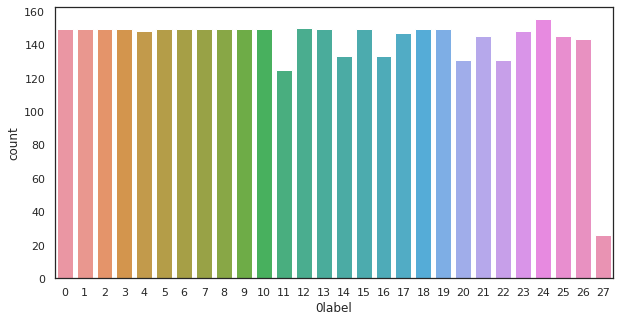

In [ ]:
print(total_df['0label'].value_counts())
plt.figure(figsize = (10,5))
sns.countplot(total_df['0label'])

We can see that the comma (27) doesnt have a ot of exaples.
in our bank check recognizer we can assum that there will not be alot evet at al commas.
the other letters trainig data is very similer.

##check null values

In [ ]:
total_df.drop('0label',axis = 1).isnull().any().describe()

count      2352
unique        1
top       False
freq       2352
dtype: object

##Rescle the images

first we divied the data to data and labels again, then rescale the images.

In [ ]:
train_X = total_df.drop('0label',axis = 1)
train_Y = total_df['0label']
#free some memory
del total_df

rescaling and reshape to 28*28 for the CNN
* change the image to grayscale to use mnist architecture

In [ ]:
train_X = train_X/255.0
train_X = train_X.values.reshape(-1,28,28,3)
train_X = tf.image.rgb_to_grayscale(train_X)
#convert the colors to be the same as mnist
train_X = (train_X-1)*-1

In [ ]:
train_X.shape

TensorShape([3946, 28, 28, 1])

##label encoding
Encode labels to one hot vectors `(ex : 2 -> [0,0,1,0,0,0,0,0,0,0])`

In [ ]:
train_Y = to_categorical(train_Y,num_classes = 28)

##Split the training data
We will splite the training data with sklearn.
so we can prefor data augmantation only on the training data.

In [ ]:
#set random seed
random_seed = 2

#split the data to train and validation
x_train,val_train,y_train,y_val = train_test_split(train_X.numpy(),train_Y,
                                                   test_size = 0.1,
                                                   random_state = random_seed)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


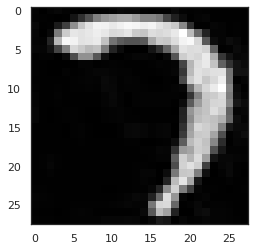

In [ ]:
plt.imshow(x_train[3][:,:,0],cmap = 'gray')
print(y_train[3])

#CNN and Image augmantation
The architecture of the model is based on the MNIST solution but we will add more filters to the first layers sence there are more suffisticated patters and 28 options unlike the MNIST dataset who have 9.
Another reason is the special letters of the hebre language that have unique shapes. 

#Try the 0.997 acc from MNIST
now we will try the same cnn that clisified the MNIST data set with 0.997 acc, but we will change the input image(colored image) and the last latyer to get the write number of classes

In [ ]:
mnist_model_path = os.path.join(sys_path, "MNIST_model1.h5")
print(mnist_model_path)
mnist_model = tf.keras.models.load_model(mnist_model_path)

mnist_model.summary()

/content/drive/My Drive/data_sience/Project/handwrite recognizer/MNIST_model1.h5
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________

#Preform transfer learning and fine tuning

In [ ]:
# remove top layer
mnist_model.pop()

#freez the base model
mnist_model.trainable = False

#creat new top model
inputs = tf.keras.Input(shape=(28, 28, 1))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = mnist_model(inputs, training=False)
# A Dense classifier
x= tf.keras.layers.Dense(64,activation='relu')(x)
x = tf.keras.layers.Dropout(0.25)(x)
x= tf.keras.layers.Dense(128,activation='relu')(x)
outputs = tf.keras.layers.Dense(num_classes,activation = 'softmax')(x)
hb_model = tf.keras.Model(inputs, outputs)
hb_model.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
sequential (Sequential)      (None, 256)               884960    
_________________________________________________________________
dense_12 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_14 (Dense)             (None, 28)                3612      
Total params: 913,340
Trainable params: 28,380
Non-trainable params: 884,960
___________________________________________

##Optimizer and annealer


In [ ]:
BATCH_SIZE = 32
EPOCHS = 200
optimizer = 'adam'
loss = 'categorical_crossentropy'
metrics = ['accuracy']
hb_model.compile(optimizer=optimizer,loss = loss,metrics = metrics)

Now we will set the learning rate.
in order 





In [ ]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

#Train the model without data augmantatuion

In [ ]:
y_val.shape

(395, 28)

In [ ]:

history = hb_model.fit(x_train,y_train,
                    batch_size=BATCH_SIZE,epochs=EPOCHS,
                    validation_data = (val_train,y_val),
                    callbacks = learning_rate_reduction)

Epoch 1/200
111/111 [==============================] - 1s 6ms/step - loss: 2.6635 - accuracy: 0.2951 - val_loss: 1.8985 - val_accuracy: 0.5494
Epoch 2/200
111/111 [==============================] - 0s 4ms/step - loss: 1.6521 - accuracy: 0.5483 - val_loss: 1.4985 - val_accuracy: 0.6354
Epoch 3/200
111/111 [==============================] - 0s 4ms/step - loss: 1.3783 - accuracy: 0.6029 - val_loss: 1.3719 - val_accuracy: 0.6405
Epoch 4/200
111/111 [==============================] - 0s 3ms/step - loss: 1.2549 - accuracy: 0.6333 - val_loss: 1.2933 - val_accuracy: 0.6658
Epoch 5/200
111/111 [==============================] - 0s 4ms/step - loss: 1.1690 - accuracy: 0.6601 - val_loss: 1.2498 - val_accuracy: 0.6911
Epoch 6/200
111/111 [==============================] - 0s 4ms/step - loss: 1.1082 - accuracy: 0.6761 - val_loss: 1.2280 - val_accuracy: 0.6911
Epoch 7/200
111/111 [==============================] - 0s 3ms/step - loss: 1.0538 - accuracy: 0.7015 - val_loss: 1.1875 - val_accuracy: 0.7038

### Plot resualts
we can see that while the training accuracy is very high (97-98%) the validation set acc is lower (80-83%).
lets plot the accuracy and loss graphs.

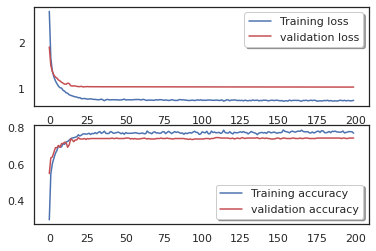

In [ ]:
epochs_range = range(EPOCHS)

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

fig, ax = plt.subplots(2,1)
#plot loss graph
ax[0].plot(epochs_range,train_loss,color = 'b', label = "Training loss")
ax[0].plot(epochs_range,val_loss,color = 'r', label = "validation loss")
legend = ax[0].legend(loc = 'best',shadow = True)
#plot accuracy graph
ax[1].plot(epochs_range,train_acc,color = 'b', label = "Training accuracy")
ax[1].plot(epochs_range,val_acc,color = 'r', label = "validation accuracy")
legend = ax[1].legend(loc = 'best',shadow = True)


#Data augmantation
as we can see the model is overfitting.
we will try to reduce it using data augmantation.

In [ ]:
#############old data augmantation#########################
# datagen = ImageDataGenerator( featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
#         zoom_range = 0.1, # Randomly zoom image 
#         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#         horizontal_flip=False,  # randomly flip images
#         vertical_flip=False)  # randomly flip images
# datagen.fit(x_train)

In [ ]:
# # Fit the model with image data generator
# history = hb_model.fit_generator(datagen.flow(x_train,y_train, batch_size=BATCH_SIZE),
#                               epochs = EPOCHS, validation_data = (val_train,y_val),
#                               verbose = 1, steps_per_epoch=x_train.shape[0] // BATCH_SIZE
#                               )

In [ ]:
augment = tf.keras.Sequential([
    # preprocessing.RandomContrast(factor=0.5),
    #tf.keras.layers.experimental.preprocessing.RandomFlip(mode='horizontal'), # meaning, left-to-right
    #tf.keras.layers.experimental.preprocessing.RandomFlip(mode='vertical'), # meaning, top-to-bottom
    tf.keras.layers.experimental.preprocessing.RandomWidth(0.15), # horizontal stretch
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1)
])

#creat new top model
inputs = tf.keras.Input(shape=(28, 28, 1))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = augment(inputs)
# A Dense classifier
outputs =hb_model(x)
aug_model = tf.keras.Model(inputs, outputs)
aug_model.summary()




Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
sequential (Sequential)      (None, 28, None, 1)       0         
_________________________________________________________________
functional_9 (Functional)    (None, 28)                913340    
Total params: 913,340
Trainable params: 28,380
Non-trainable params: 884,960
_________________________________________________________________


In [ ]:
aug_model.compile(optimizer=optimizer,loss = loss,metrics = metrics)

history = hb_model.fit(x_train,y_train,
                    batch_size=BATCH_SIZE,epochs=EPOCHS,
                    validation_data = (val_train,y_val),
                    callbacks = learning_rate_reduction)

Epoch 1/200
111/111 [==============================] - 0s 4ms/step - loss: 0.7524 - accuracy: 0.7722 - val_loss: 1.0283 - val_accuracy: 0.7392
Epoch 2/200
111/111 [==============================] - 0s 4ms/step - loss: 0.7549 - accuracy: 0.7730 - val_loss: 1.0280 - val_accuracy: 0.7392
Epoch 3/200
111/111 [==============================] - 0s 3ms/step - loss: 0.7619 - accuracy: 0.7739 - val_loss: 1.0277 - val_accuracy: 0.7392
Epoch 4/200
111/111 [==============================] - 0s 3ms/step - loss: 0.7660 - accuracy: 0.7668 - val_loss: 1.0272 - val_accuracy: 0.7418
Epoch 5/200
111/111 [==============================] - 0s 3ms/step - loss: 0.7604 - accuracy: 0.7702 - val_loss: 1.0272 - val_accuracy: 0.7392
Epoch 6/200
111/111 [==============================] - 0s 4ms/step - loss: 0.7630 - accuracy: 0.7716 - val_loss: 1.0271 - val_accuracy: 0.7392
Epoch 7/200
111/111 [==============================] - 0s 3ms/step - loss: 0.7611 - accuracy: 0.7772 - val_loss: 1.0274 - val_accuracy: 0.7443

#plote resultes

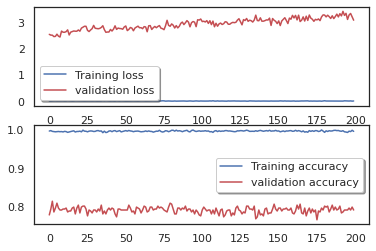

In [ ]:
lot_lossAndAccuracy(EPOCHS,history)

Now we are not overffiting, but our accuracy is still not setisfing. (83-84 on test and validation)

#train the hole model

In [ ]:
# Unfreeze the base model
mnist_model.trainable = True

# It's important to recompile your model after you make any changes
# to the `trainable` attribute of any inner layer, so that your changes
# are take into account
hb_model.compile(optimizer=optimizer,loss = loss,metrics = metrics)

# Train end-to-end. Be careful to stop before you overfit!
history = hb_model.fit(x_train,y_train,
                    batch_size=BATCH_SIZE,epochs=EPOCHS,
                    validation_data = (val_train,y_val),
                    callbacks = learning_rate_reduction)


Epoch 1/200
111/111 [==============================] - 1s 7ms/step - loss: 0.8291 - accuracy: 0.7432 - val_loss: 0.9560 - val_accuracy: 0.7722
Epoch 2/200
111/111 [==============================] - 1s 5ms/step - loss: 0.7281 - accuracy: 0.7865 - val_loss: 0.9924 - val_accuracy: 0.7392
Epoch 3/200
111/111 [==============================] - 0s 4ms/step - loss: 0.5809 - accuracy: 0.8254 - val_loss: 0.9603 - val_accuracy: 0.7671
Epoch 4/200
111/111 [==============================] - 0s 4ms/step - loss: 0.5233 - accuracy: 0.8437 - val_loss: 0.9387 - val_accuracy: 0.7797
Epoch 5/200
111/111 [==============================] - 0s 4ms/step - loss: 0.4611 - accuracy: 0.8589 - val_loss: 0.9702 - val_accuracy: 0.7873
Epoch 6/200
111/111 [==============================] - 0s 4ms/step - loss: 0.3980 - accuracy: 0.8798 - val_loss: 0.9626 - val_accuracy: 0.7924
Epoch 7/200
111/111 [==============================] - 0s 4ms/step - loss: 0.3777 - accuracy: 0.8783 - val_loss: 0.9871 - val_accuracy: 0.8177

we ca see that the model preforms very well on the training data.
the validation accuracy has improved but stiil only 82-83%

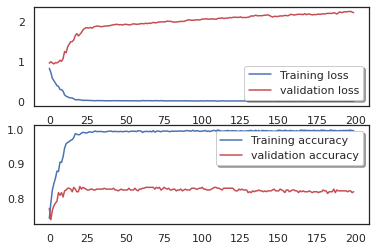

In [ ]:
lot_lossAndAccuracy(EPOCHS,history)

#Explore errors

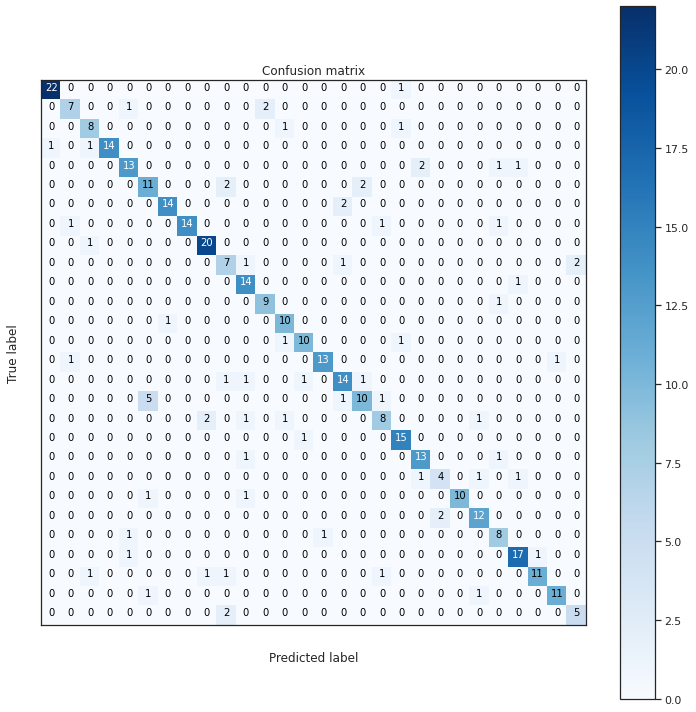

In [ ]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, color ='white', rotation=45)
    plt.yticks(tick_marks, classes,color ='white')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = aug_model.predict(val_train)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = classes)

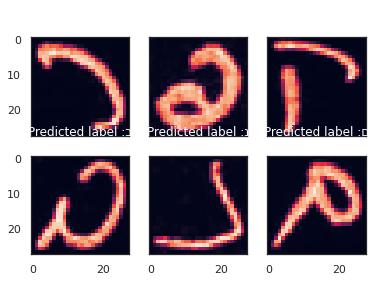

In [ ]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = val_train[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(classes[pred_errors[error]],
                                                                               classes[obs_errors[error]]),
                                  color = 'white')
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

The most important errors are also the most intrigous.
The most important errors as mostly missclassified images or hard to recognized.

In [ ]:
export_path_keras = "HB_model.h5"
print(export_path_keras)
aug_model.save(export_path_keras)

HB_model.h5
HB_model.h5
